In [3]:
import pandas as pd
import numpy as np
import matplotlib
from darts import TimeSeries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import plot_utils as plotter

In [14]:
results0 = plotter.load_metrics()
results1 = plotter.load_metrics(1)
results2 = plotter.load_metrics(2)

output/results_var0
output/results_var1
output/results_var2


In [17]:
rmse_results = results0['yearly_RMSE']

In [18]:
rmse_results

Model
ARIMA, Uni                     12526.194701
ExponentialSmoothing, Uni      11312.620569
Prophet, Uni                   16242.641877
NBEATSModel, Uni                9773.378832
LinearRegression, Uni          12464.425383
XGBRegressor, Uni              13095.696829
NBEATSModel                    20314.225100
LinearRegression               13185.509928
XGBRegressor                   13665.796190
Multi Model                    11312.620569
NBEATSModel, MiNT              20160.845028
NBEATSModel, Top Down          25019.254042
NBEATSModel, Bottom Up         32157.900988
LinearRegression, MiNT         11292.212091
LinearRegression, Top Down     13296.151661
LinearRegression, Bottom Up    13185.509928
XGBRegressor, MiNT             10229.725144
XGBRegressor, Top Down         10634.552881
XGBRegressor, Bottom Up        18259.333329
Multi Model, MiNT               8871.194416
Multi Model, Top Down          15667.401985
Multi Model, Bottom Up         19505.944730
Name: yearly_RMSE, dtype: 

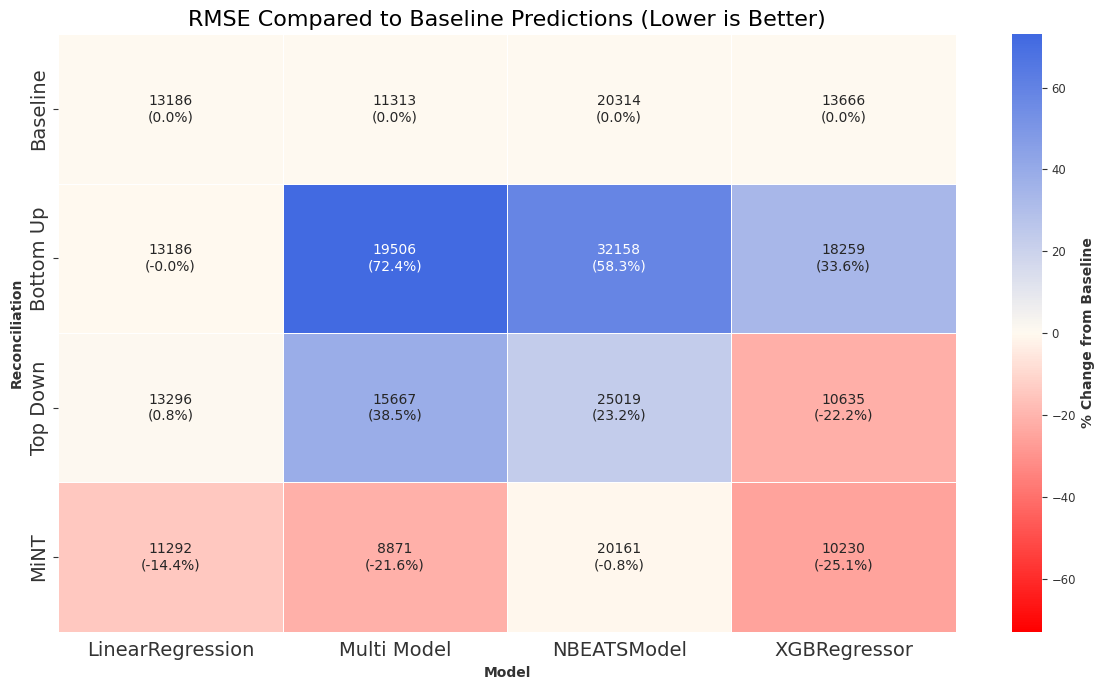

In [19]:
plotter.make_heat_map(rmse_results)

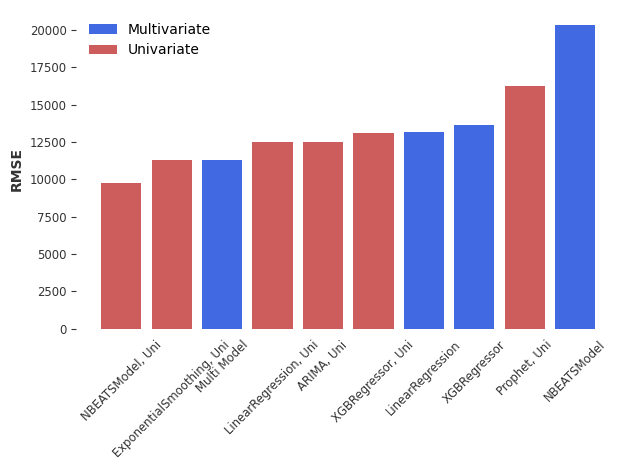

In [20]:
data=[]
from matplotlib.patches import Patch
for row in results0.iterrows():
    s = str(row[0])
    temp = s.split(',')
    rmse = row[1]
    rmse=rmse['yearly_RMSE']
    if len(temp) == 1:
        color = 'royalblue'
    elif temp[1].strip().lower() == 'uni':
        color = 'indianred'
    else:
        continue
    if temp[0]=="Per Series":
        s="Multi-Model"
    data.append((s,rmse, color))

data_s = sorted(data, key=lambda x: x[1])

labels, values, colors = zip(*data_s)

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=colors)

# Remove grid lines
#ax.grid(False)[6][11]

# Remove grid lines
ax.grid(False)

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45)
plt.legend([])
plt.ylabel('RMSE')
plt.tight_layout()
legend_elements = [
    Patch(facecolor='royalblue', label='Multivariate'),
    Patch(facecolor='indianred', label='Univariate')
]
ax.legend(handles=legend_elements)

#ax.title='Univariate vs Multivariate Baselines RMSE'
plt.savefig('output/univsmulti')
plt.show()


In [21]:
temp=results0[['yearly_RMSE']].join(results1[['yearly_RMSE']], on='Model', rsuffix='.v1')
rmse_compare_cross_var = temp.join(results2[['yearly_RMSE']], on='Model', rsuffix='.v2')

In [22]:
rmse_compare_cross_var['Best Performance']= rmse_compare_cross_var.idxmin(axis=1)

In [23]:
rmse_compare_cross_var.sort_values('Best Performance')

,yearly_RMSE,yearly_RMSE.v1,yearly_RMSE.v2,Best Performance
Model,,,,
"ARIMA, Uni",12526.194701,12526.194701,12526.194701,yearly_RMSE
"ExponentialSmoothing, Uni",11312.620569,11312.620569,11312.620569,yearly_RMSE
"Prophet, Uni",16242.641877,16242.641877,16242.641877,yearly_RMSE
"NBEATSModel, Uni",9773.378832,10125.348135,10914.071192,yearly_RMSE
"LinearRegression, Uni",12464.425383,12464.425383,12464.425383,yearly_RMSE
"XGBRegressor, Uni",13095.696829,13095.696829,13095.696829,yearly_RMSE
"Multi Model, MiNT",8871.194416,10610.262714,37948.853801,yearly_RMSE
LinearRegression,13185.509928,14126.858281,14988.621814,yearly_RMSE
Multi Model,11312.620569,11312.620569,11312.620569,yearly_RMSE


In [104]:
for row in rmse_compare_cross_var.iterrows():
    print(f"Model: {row[0]}, Val: {row[1]['Best Performance']}")

Model: ARIMA, Val: yearly_RMSE
Model: ExponentialSmoothing, Val: yearly_RMSE
Model: Prophet, Val: yearly_RMSE
Model: LinearRegression, Val: yearly_RMSE.v1
Model: XGBRegressor, Val: yearly_RMSE.v1
Model: NBEATSModel, Val: yearly_RMSE.v1
Model: NBEATSModel, MiNT, Val: yearly_RMSE.v1
Model: NBEATSModel, Top Down, Val: yearly_RMSE.v1
Model: NBEATSModel, Bottom Up, Val: yearly_RMSE
Model: LinearRegression, MiNT, Val: yearly_RMSE
Model: LinearRegression, Top Down, Val: yearly_RMSE
Model: LinearRegression, Bottom Up, Val: yearly_RMSE
Model: XGBRegressor, MiNT, Val: yearly_RMSE.v1
Model: XGBRegressor, Top Down, Val: yearly_RMSE.v1
Model: XGBRegressor, Bottom Up, Val: yearly_RMSE.v1
Model: per series, MiNT, Val: yearly_RMSE
Model: per series, Top Down, Val: yearly_RMSE
Model: per series, Bottom Up, Val: yearly_RMSE


In [24]:
v0_preds = plotter.load_predictions(varnum=0)
v1_preds = plotter.load_predictions(varnum=0)
v2_preds = plotter.load_predictions(varnum=0)

In [25]:
val = plotter.load_val()
val=val.set_index('Date')
val.index = pd.to_datetime(val.index)
val.columns=['Actuals']

In [26]:
all = ['ARIMA, Uni', 'ExponentialSmoothing, Uni', 'LinearRegression',
       'LinearRegression, Bottom Up', 'LinearRegression, MiNT',
       'LinearRegression, Top Down', 'LinearRegression, Uni', 'NBEATSModel',
       'NBEATSModel, Bottom Up', 'NBEATSModel, MiNT', 'NBEATSModel, Top Down',
       'NBEATSModel, Uni', 'Prophet, Uni', 'XGBRegressor',
       'XGBRegressor, Bottom Up', 'XGBRegressor, MiNT',
       'XGBRegressor, Top Down', 'XGBRegressor, Uni', 'per series, Bottom Up',
       'per series, MiNT', 'per series, Top Down', 'Actuals'],

In [27]:
best = ['ExponentialSmoothing, Uni',  'LinearRegression, MiNT',
       'NBEATSModel, Uni', 'XGBRegressor, MiNT',
       'XGBRegressor',
       'per series, MiNT'],

In [32]:
results0.sort_values(by='yearly_RMSE')

,yearly_RMSE,yearly_MAE,yearly_R2,yearly_sMAPE,avg_quarterly_RMSE,var_quarterly_RMSE,max_quarterly_RMSE,avg_quarterly_sMAPE,var_quarterly_sMAPE,max_quarterly_sMAPE
Model,,,,,,,,,,
"Multi Model, MiNT",8871.194416,7112.001810,0.897962,56.931655,8583.200246,6.702352e+06,11613.549230,56.931655,3440.704877,143.027356
"NBEATSModel, Uni",9773.378832,8014.693966,0.876152,90.727489,9408.926015,9.321393e+06,13147.720629,90.727489,3786.197826,167.738434
"XGBRegressor, MiNT",10229.725144,7859.362894,0.864317,92.341622,9805.839165,1.132373e+07,13857.679666,92.341622,5949.052997,196.480586
"XGBRegressor, Top Down",10634.552881,8683.870507,0.853365,99.864484,10238.849072,1.101291e+07,12774.133104,99.864484,5747.819205,200.000000
"LinearRegression, MiNT",11292.212091,8511.581278,0.834668,77.319262,10049.045558,3.537432e+07,18361.743604,77.319262,7228.336292,200.000000
Multi Model,11312.620569,9987.795880,0.834070,84.667552,11275.771384,1.109818e+06,12544.634831,84.667552,3511.913041,161.140886
"ExponentialSmoothing, Uni",11312.620569,9987.795880,0.834070,84.667552,11275.771384,1.109818e+06,12544.634831,84.667552,3511.913041,161.140886
"LinearRegression, Uni",12464.425383,10010.866633,0.798561,78.455554,11946.089359,1.687047e+07,15711.378391,78.455554,4207.751810,162.568282
"ARIMA, Uni",12526.194701,10593.304349,0.796560,81.975804,12329.953627,6.503730e+06,14901.720431,81.975804,4069.500926,163.453853


InvalidIndexError: (['ExponentialSmoothing, Uni', 'LinearRegression, MiNT', 'NBEATSModel, Uni', 'XGBRegressor, MiNT', 'XGBRegressor', 'per series, MiNT'],)

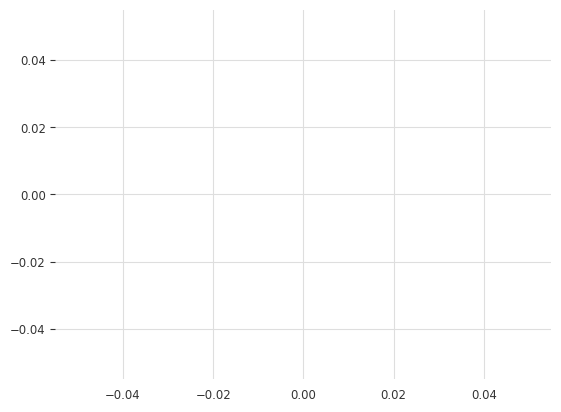

In [30]:
ax = plt.gca()
ax.plot()
for b in best:
    ax.plot(v0_preds[best])